In [1]:
using ModelingToolkit
using DifferentialEquations
using Plots

Let's try it out for the following system 
\begin{aligned}
    \dot{x} &= \sigma(x-y) \\ 
    \dot{y} &= x(\rho - z) - y  \\ 
    \dot{z} &= xy - \beta z
\end{aligned}

In [2]:
# set up variables/parameters
@variables t x(t) y(t) z(t) 
@parameters σ ρ β
D = Differential(t)



(::Differential) (generic function with 2 methods)

In [3]:
@named lorenz = ODESystem([
    D(x) ~ σ*(y-x)
    D(y) ~ x*(ρ-z) - y 
    D(z) ~ x*y - β*z
])

Model lorenz with 3 equations
States (3):
  x(t)
  y(t)
  z(t)
Parameters (3):
  σ
  ρ
  β

In [7]:
prob = ODEProblem(
    structural_simplify(lorenz),
    [x=>1.0, y=>0.0, z=>0.0],
    (0.0,10.0),
    [σ => 10.0, ρ => 28.0, β => (8/3)],
    jac=true,
    sparse=true
)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [8]:
sol = solve(prob, jac=true, sparse=true)

┌ Warning: Warning: Unrecognized keyword arguments found. Future versions will error.
│ The only allowed keyword arguments to `solve` are: 
│ (:dense, :saveat, :save_idxs, :tstops, :d_discontinuities, :save_everystep, :save_on, :save_start, :save_end, :initialize_save, :adaptive, :abstol, :reltol, :dt, :dtmax, :dtmin, :force_dtmin, :internalnorm, :controller, :gamma, :beta1, :beta2, :qmax, :qmin, :qsteady_min, :qsteady_max, :qoldinit, :failfactor, :calck, :alias_u0, :maxiters, :callback, :isoutofdomain, :unstable_check, :verbose, :merge_callbacks, :progress, :progress_steps, :progress_name, :progress_message, :timeseries_errors, :dense_errors, :calculate_errors, :initializealg, :alg, :save_noise, :delta, :seed, :alg_hints, :kwargshandle, :trajectories, :batch_size, :sensealg, :advance_to_tstop, :stop_at_next_tstop)
│ See https://diffeq.sciml.ai/stable/basics/common_solver_opts/ for more details.
│ 
│ Set kwargshandle=KeywordArgError for an error message and more details.
│ Set kwargsha

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 104-element Vector{Float64}:
  0.0
  3.5678604836301404e-5
  0.0003924646531993154
  0.0032624087100077666
  0.009058076582749423
  0.016956470605311864
  0.027689959227781235
  0.04185635103821218
  0.060240410627700816
  0.0836854113984534
  0.11336499269451543
  0.14862181409827
  0.18703978025370946
  ⋮
  8.854893753966822
  8.965662134819611
  9.082539337396287
  9.181787148579398
  9.291289049504522
  9.389878163426545
  9.523325873771135
  9.626465957999306
  9.745734139492404
  9.839208473866107
  9.944480199643703
 10.0
u: 104-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591550149778, 0.08977063252764937, 0.0001438019170127846]
 [0.924204355043198, 0.242289149116772, 0.0010461625397616113]
 [0.880

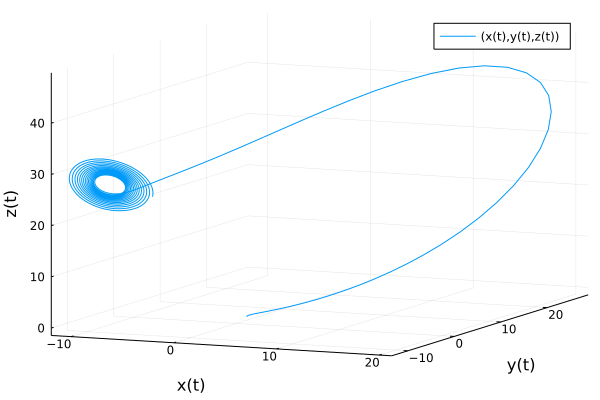

In [10]:
plot(sol, vars=(x, y, z))